# DataFrames Tutorial

DataFrames is a high-level data manipulation tool. It lets you clean, transform, manipulate, and perform analysis on your dataset.
If you don't have it installed, you can install it with the command below

`using Pkg; Pkg.add("DataFrames")`

This notebook will walk you through the DataFrames workflow viz. 
   - Creating dataframes
   - Reading DataFrames from files
   - Accessing, indexing
   - Column/Row operations
   - Cleaning datasets
   - Imputing missing values
   - Calculating statistics
   - Slicing and conditional slicing
   - Dealing with categorical data
   - Sorting
   - Group operations with split-apply-combine strategy
   - Plotting

In [1]:
using DataFrames #import DataFrames package

## Creating a dataframe
 A dataframe can be created out of column vectors or dictionary

#### Creating from column names and column vectors

In the example below, we create a dataframe to hold the scores of 4 students in Math and Science


In [2]:
df = DataFrame(Id = [991, 992,993,994],Math = [80,85,90,76], Science = [92,83,78,96])

,Id,Math,Science
,Int64,Int64,Int64
1,991,80,92
2,992,85,83
3,993,90,78
4,994,76,96


#### Creating a dataframe from a dictionary
The dataframe above can also be created out of a dictionary. 
In this case, the keys become column names and the corresponding values become the column vectors

In [3]:
df_dict = Dict(:Id => [991, 992,993,994], :Math => [80,85,90,76], :Science => [92,83,78,96]);
df = DataFrame(df_dict)

,Id,Math,Science
,Int64,Int64,Int64
1,991,80,92
2,992,85,83
3,993,90,78
4,994,76,96


### Accessing a column vector
The columns can be accessed by the column names

In [4]:
math_scores = df[!, :Math] # the ! symbol collects all rows of the columns

4-element Array{Int64,1}:
 80
 85
 90
 76

You can also pass ranges for rows to take a subset of rows

In [5]:
df[2:4, :Math] # here we take rows from 2 to 4 of the column Math

3-element Array{Int64,1}:
 85
 90
 76

Alternatively, since column names are fieldnames of DataFrames, we can access the like below

In [6]:
math_scores = df.Math

4-element Array{Int64,1}:
 80
 85
 90
 76

In [7]:
df.Math[2:4] # this gives the rows 2 to 4 of column Math

3-element Array{Int64,1}:
 85
 90
 76

In [8]:
scores = select(df, [:Math, :Science]) #return a dataframe with those columns

,Math,Science
,Int64,Int64
1,80,92
2,85,83
3,90,78
4,76,96


### Change column values

We had initialized the Id column with numbers, let's replace them with student names

In [9]:
df[!,:Id] = ["Alice", "Bob", "Charlie", "Dave"];
df

,Id,Math,Science
,String,Int64,Int64
1,Alice,80,92
2,Bob,85,83
3,Charlie,90,78
4,Dave,76,96


In [10]:
df.Id = ["Alice", "Bob", "Charlie", "Dave"];

The rows numbers can be passed as discussed in the previous section if need be

## Reading in from a file

In [11]:
using CSV # CSV is the most common format for storing dataframes, the CSV package lets you read files quickly

In [12]:
df = CSV.read("imdb.csv",copycols=true)

,title,wordsInTitle,url
,String,String?,String
1,der vagabund und das kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/
2,goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/
3,metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/
4,der general (1926),der general,http://www.imdb.com/title/tt0017925/
5,lichter der großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/
6,m (1931),m,http://www.imdb.com/title/tt0022100/
7,es geschah in einer nacht (1934),es geschah in einer nacht,http://www.imdb.com/title/tt0025316/
8,moderne zeiten (1936),moderne zeiten,http://www.imdb.com/title/tt0027977/
9,vom winde verweht (1939),vom winde verweht,http://www.imdb.com/title/tt0031381/


## Exploring a dataframe

Get dimensions of a dataframe

In [13]:
size(df)

(13038, 43)

View first few rows

In [65]:
show(first(df,5), allcols=true) #we pass the value 5 to view first 5 rows

5×43 DataFrame
│ Row │ title                                               │
│     │ String                                              │
├─────┼─────────────────────────────────────────────────────┤
│ 1   │ das blut eines dichters (1932)                      │
│ 2   │ the 80th annual academy awards (2008)               │
│ 3   │ irish cinema: ourselves alone? (1995)               │
│ 4   │ getaway                                             │
│ 5   │ the 66th annual golden globe awards (tv movie 2009) │

│ Row │ wordsInTitle                               │
│     │ Union{Missing, String}                     │
├─────┼────────────────────────────────────────────┤
│ 1   │ das blut eines dichters                    │
│ 2   │ the th annual academy awards               │
│ 3   │ irish cinema ourselves alone               │
│ 4   │ getaway episode tv episode                 │
│ 5   │ the th annual golden globe awards tv movie │

│ Row │ url                                  │ imdbRating │ rat

View last few rows

In [66]:
show(last(df,5), allcols=true) #we pass the value 5 to view last 5 rows

5×43 DataFrame
│ Row │ title                           │ wordsInTitle            │
│     │ String                          │ Union{Missing, String}  │
├─────┼─────────────────────────────────┼─────────────────────────┤
│ 1   │ was kommen wird (1936)          │ was kommen wird         │
│ 2   │ tangents (1994)                 │ tangents                │
│ 3   │ sex files: alien erotica (1998) │ sex files alien erotica │
│ 4   │ the cell (2000)                 │ the cell                │
│ 5   │ dante 01 (2008)                 │ dante                   │

│ Row │ url                                  │ imdbRating │ ratingCount │
│     │ String                               │ Float64?   │ Int64?      │
├─────┼──────────────────────────────────────┼────────────┼─────────────┤
│ 1   │ http://www.imdb.com/title/tt0028358/ │ 6.8        │ 4014        │
│ 2   │ http://www.imdb.com/title/tt0145529/ │ 2.3        │ 2274        │
│ 3   │ http://www.imdb.com/title/tt0208676/ │ 6.0        │ 286       

Get a summary of dataframe

The describe method calculates statistics of all columns, datatypes, and gives you an overview of the dataframe

In [16]:
describe(df)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,title,,#1 cheerleader camp (video 2010),,überleben! (1993)
2,wordsInTitle,,a beautiful mind genie und wahnsinn,,zwischen zw lf und drei
3,url,,http://www.imdb.com/title/tt0000005/,,http://www.imdb.com/title/tt3671608/
4,imdbRating,6.82774,1.3,7.0,9.9
5,ratingCount,27959.6,5,4598.0,1183395
6,duration,5685.34,2,5820.0,68400
7,year,1989.3,1888.0,1998.0,2017.0
8,type,,game,,video.tv
9,nrOfWins,3.41226,0,0.0,226


Get names of columns

The names method returns the column names as an array

In [17]:
names(df)

43-element Array{String,1}:
 "title"
 "wordsInTitle"
 "url"
 "imdbRating"
 "ratingCount"
 "duration"
 "year"
 "type"
 "nrOfWins"
 "Nominations"
 "nrOfPhotos"
 "nrOfNewsArticles"
 "nrOfUserReviews"
 ⋮
 "Mystery"
 "News"
 "RealityTV"
 "Romance"
 "SciFi"
 "Short"
 "Sport"
 "TalkShow"
 "Thriller"
 "War"
 "Western"
 "genre"

Accessing columns and rows

In [20]:
df[!,:imdbRating] #access by column name

13038-element Array{Union{Missing, Float64},1}:
 8.4
 8.3
 8.4
 8.3
 8.7
 8.5
 8.3
 8.6
 8.2
 8.4
 8.1
 8.2
 8.5
 ⋮
 6.5
 7.4
 7.3
 8.1
 7.1
 6.7
 6.5
 8.4
 8.6
 8.4
 7.6
 7.3

Access by row index

In [21]:
df[23,:title] 

"fahrraddiebe (1948)"

In [22]:
df[!,:title][23]

"fahrraddiebe (1948)"

In order to find the unique values in an array/column/row, you can call `unique` function to return an array containing only the unique elements of collection

In [23]:
df[!,:genre]|>unique

29-element Array{String,1}:
 "Comedy"
 "Drama"
 "Crime"
 "Adventure"
 "Action"
 "FilmNoir"
 "Horror"
 "Mystery"
 "Biography"
 "Western"
 "Animation"
 "Documentary"
 "TalkShow"
 ⋮
 "Fantasy"
 "Musical"
 "Adult"
 "Romance"
 "News"
 "RealityTV"
 "Short"
 "Family"
 "War"
 "History"
 "Music"
 "Sport"

In [24]:
unique(df[!,:genre])

29-element Array{String,1}:
 "Comedy"
 "Drama"
 "Crime"
 "Adventure"
 "Action"
 "FilmNoir"
 "Horror"
 "Mystery"
 "Biography"
 "Western"
 "Animation"
 "Documentary"
 "TalkShow"
 ⋮
 "Fantasy"
 "Musical"
 "Adult"
 "Romance"
 "News"
 "RealityTV"
 "Short"
 "Family"
 "War"
 "History"
 "Music"
 "Sport"

## Transforming your dataset

Renaming a column

In [18]:
rename!(df, :nrOfWins => "Wins");

Applying a function

In [19]:
df[!,:title] = lowercase.(df[!,:title])

13038-element Array{String,1}:
 "der vagabund und das kind (1921)"
 "goldrausch (1925)"
 "metropolis (1927)"
 "der general (1926)"
 "lichter der großstadt (1931)"
 "m (1931)"
 "es geschah in einer nacht (1934)"
 "moderne zeiten (1936)"
 "vom winde verweht (1939)"
 "mr. smith geht nach washington (1939)"
 "der zauberer von oz (1939)"
 "früchte des zorns (1940)"
 "der große diktator (1940)"
 ⋮
 "ein sheriff in new york"
 "millennium - fürchte deinen nächsten wie dich selbst"
 "twen-police"
 "die monkees"
 "mork vom ork"
 "ein yankee aus connecticut an könig arthurs hof (1949)"
 "never mind the buzzcocks"
 "newhart"
 "männerwirtschaft"
 "only fools and horses...."
 "parker lewis - der coole von der schule"
 "playhouse 90"

## Removing duplicate rows

In [25]:
size(df)

(13038, 43)

In [26]:
#add 2 duplicate rows
df_dup = vcat(df, df[1:2,:])

,title,wordsInTitle,url
,String,String?,String
1,der vagabund und das kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/
2,goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/
3,metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/
4,der general (1926),der general,http://www.imdb.com/title/tt0017925/
5,lichter der großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/
6,m (1931),m,http://www.imdb.com/title/tt0022100/
7,es geschah in einer nacht (1934),es geschah in einer nacht,http://www.imdb.com/title/tt0025316/
8,moderne zeiten (1936),moderne zeiten,http://www.imdb.com/title/tt0027977/
9,vom winde verweht (1939),vom winde verweht,http://www.imdb.com/title/tt0031381/


In [27]:
unique(df_dup)

,title,wordsInTitle,url
,String,String?,String
1,der vagabund und das kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/
2,goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/
3,metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/
4,der general (1926),der general,http://www.imdb.com/title/tt0017925/
5,lichter der großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/
6,m (1931),m,http://www.imdb.com/title/tt0022100/
7,es geschah in einer nacht (1934),es geschah in einer nacht,http://www.imdb.com/title/tt0025316/
8,moderne zeiten (1936),moderne zeiten,http://www.imdb.com/title/tt0027977/
9,vom winde verweht (1939),vom winde verweht,http://www.imdb.com/title/tt0031381/


## Handling Missing Values

### Number of missing values in each column

`ismissing` method can be used to test for Missing values

In [28]:
for i in names(df)
    println(i," => ", sum(ismissing.(df[!,i]))) #ismisisng return a boolean, we can sum over it
end

title => 0
wordsInTitle => 13
url => 0
imdbRating => 531
ratingCount => 531
duration => 909
year => 27
type => 0
Wins => 0
Nominations => 0
nrOfPhotos => 0
nrOfNewsArticles => 0
nrOfUserReviews => 0
nrOfGenre => 0
Action => 0
Adult => 0
Adventure => 0
Animation => 0
Biography => 0
Comedy => 0
Crime => 0
Documentary => 0
Drama => 0
Family => 0
Fantasy => 0
FilmNoir => 0
GameShow => 0
History => 0
Horror => 0
Music => 0
Musical => 0
Mystery => 0
News => 0
RealityTV => 0
Romance => 0
SciFi => 0
Short => 0
Sport => 0
TalkShow => 0
Thriller => 0
War => 0
Western => 0
genre => 0


### Find rows without missing values

`completecases` returns a Boolean vector with true entries indicating rows without missing values

It can be called on the dataframe or a subset like a row/columns

In [67]:
complete_rows = completecases(df) #on entire dataframe

13036-element BitArray{1}:
 1
 1
 1
 0
 1
 1
 1
 1
 1
 0
 1
 1
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [30]:
completecases(df, :ratingCount) #on a column

13038-element BitArray{1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

### Drop misssing values

`dropmissing` method returns a copy of dataframe  excluding rows with missing values

In [31]:
df_without_missing = dropmissing(df)

,title,wordsInTitle,url
,String,String,String
1,der vagabund und das kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/
2,goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/
3,metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/
4,der general (1926),der general,http://www.imdb.com/title/tt0017925/
5,lichter der großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/
6,m (1931),m,http://www.imdb.com/title/tt0022100/
7,es geschah in einer nacht (1934),es geschah in einer nacht,http://www.imdb.com/title/tt0025316/
8,moderne zeiten (1936),moderne zeiten,http://www.imdb.com/title/tt0027977/
9,vom winde verweht (1939),vom winde verweht,http://www.imdb.com/title/tt0031381/


In [32]:
size(df_without_missing)

(11775, 43)

### Impute missing values

In [33]:
using Statistics
mean_duration = mean(skipmissing(df.duration)) #impute with average values

5685.344546129112

In [34]:
df.duration = coalesce.(df.duration, mean_duration)#replace missing values with mean

13038-element Array{Real,1}:
  3240
  5700
  9180
  6420
  5220
  7020
  6300
  5220
 14280
  7740
  6120
  7740
  7500
     ⋮
  4500
  3600
  3600
  1800
  1800
  6360
  1800
  1800
  1800
  3000
  1800
  5400

In [35]:
sum(ismissing.(df.duration)) #check if column has any missing values after imputation

0

## Feature engineering

In [36]:
df[!,:Wins_Nominations] = df.Wins .* df.Nominations

13038-element Array{Int64,1}:
  0
  2
 12
  1
  0
  0
  4
  3
 60
 40
 72
 30
  5
  ⋮
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0

In [37]:
df[!, :duration_sqrt] = sqrt.(df.duration)

13038-element Array{Float64,1}:
  56.92099788303083
  75.49834435270749
  95.81231653602788
  80.12490249604052
  72.24956747275377
  83.78544026261365
  79.37253933193772
  72.24956747275377
 119.49895397031725
  87.97726979169109
  78.23042886243178
  87.97726979169109
  86.60254037844386
   ⋮
  67.08203932499369
  60.0
  60.0
  42.42640687119285
  42.42640687119285
  79.74960814950754
  42.42640687119285
  42.42640687119285
  42.42640687119285
  54.772255750516614
  42.42640687119285
  73.48469228349535

## Deleting rows/columns

### Delete columns

In [38]:
select!(df, Not([:duration_sqrt, :Wins_Nominations]));

### Delete rows

In [39]:
delete!(df, [2,3])

,title,wordsInTitle,url
,String,String?,String
1,der vagabund und das kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/
2,der general (1926),der general,http://www.imdb.com/title/tt0017925/
3,lichter der großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/
4,m (1931),m,http://www.imdb.com/title/tt0022100/
5,es geschah in einer nacht (1934),es geschah in einer nacht,http://www.imdb.com/title/tt0025316/
6,moderne zeiten (1936),moderne zeiten,http://www.imdb.com/title/tt0027977/
7,vom winde verweht (1939),vom winde verweht,http://www.imdb.com/title/tt0031381/
8,mr. smith geht nach washington (1939),mr smith geht nach washington,http://www.imdb.com/title/tt0031679/
9,der zauberer von oz (1939),der zauberer von oz,http://www.imdb.com/title/tt0032138/


## Conditional slicing

This operation lets you create sub dataframes in which a condition holds true

In [40]:
df[df.duration .>= 7000,:] #all movies longer than 7000

,title,wordsInTitle,url
,String,String?,String
1,m (1931),m,http://www.imdb.com/title/tt0022100/
2,vom winde verweht (1939),vom winde verweht,http://www.imdb.com/title/tt0031381/
3,mr. smith geht nach washington (1939),mr smith geht nach washington,http://www.imdb.com/title/tt0031679/
4,früchte des zorns (1940),fr chte des zorns,http://www.imdb.com/title/tt0032551/
5,der große diktator (1940),der gro e diktator,http://www.imdb.com/title/tt0032553/
6,rebecca (1940),rebecca,http://www.imdb.com/title/tt0032976/
7,citizen kane (1941),citizen kane,http://www.imdb.com/title/tt0033467/
8,die besten jahre unseres lebens (1946),die besten jahre unseres lebens,http://www.imdb.com/title/tt0036868/
9,it's a wonderful life (1946),it s a wonderful life,http://www.imdb.com/title/tt0038650/




Multiple conditions can be chained as below

In [41]:
df[(df.duration .>= 7000) .& (df.Adventure .== 1),:] #all movies longer than 7000 and belong to the category "Adventure"

,title,wordsInTitle
,String,String?
1,der schatz der sierra madre (1948),der schatz der sierra madre
2,die brücke am kwai (1957),die br cke am kwai
3,ben hur (1959),ben hur
4,der unsichtbare dritte (1959),der unsichtbare dritte
5,lawrence von arabien (1962),lawrence von arabien
6,gesprengte ketten (1963),gesprengte ketten
7,zwei glorreiche halunken (1966),zwei glorreiche halunken
8,2001: odyssee im weltraum (1968),odyssee im weltraum
9,der weiße hai (1975),der wei e hai


## Categorical Data

The naive encoding used in an Array represents every entry of this vector as a full string. In contrast, we can represent the data more efficiently by replacing the strings with indices into a small pool of levels. This is what the CategoricalArray type does

In [42]:
using CategoricalArrays
genre_list = ["Unknown","Biography", "Comedy", "Crime", "Action", "Adult", "Adventure", "Animation", "Documentary", "Drama", "Family", "Fantasy", "FilmNoir", "GameShow", "History", "Horror", "Music", "Musical", "Mystery", "News", "RealityTV", "Romance", "Short",  "War", "Western","TalkShow", "Thriller","Sport","SciFi"];

If the ordered keyword argument is set to true, the resulting CategoricalArray will be ordered, which means that its levels can be tested for order 

In [43]:
genre_array = CategoricalArray(df.genre,ordered=true)

13036-element CategoricalArray{String,1,UInt32}:
 "Comedy"
 "Comedy"
 "Comedy"
 "Crime"
 "Comedy"
 "Comedy"
 "Drama"
 "Drama"
 "Adventure"
 "Drama"
 "Comedy"
 "Drama"
 "Drama"
 ⋮
 "Crime"
 "Crime"
 "Crime"
 "Comedy"
 "Comedy"
 "Comedy"
 "Comedy"
 "Comedy"
 "Comedy"
 "Comedy"
 "Comedy"
 "Comedy"

The `levels!` function also allows changing the order of appearance of the levels, which can be useful for display purposes or when working with ordered variables.

In [44]:
levels!(genre_array, genre_list); #sets genre_array to be ordered according to genre_list

In [45]:
df.genre = genre_array;

### Sorting a categorical column

Now that, the column is ordered, it can sorted like a numerical array

In [46]:
sort!(df, :genre)

,title,wordsInTitle
,String,String?
1,das blut eines dichters (1932),das blut eines dichters
2,the 80th annual academy awards (2008),the th annual academy awards
3,irish cinema: ourselves alone? (1995),irish cinema ourselves alone
4,getaway,getaway episode tv episode
5,the 66th annual golden globe awards (tv movie 2009),the th annual golden globe awards tv movie
6,the 82nd annual academy awards (2010),the nd annual academy awards
7,ikiru (tv movie 2007),ikiru tv movie
8,screen two,screen two the mcguffin tv episode
9,tiny toons spring break (tv movie 1994),tiny toons spring break tv movie


### Conditional slicing with categories

Ordering also lets you do boolean tests like less than, greater than, and equal to

In [47]:
df_genre_gt_thriller = df[df.genre .> "Thriller",:]

,title,wordsInTitle
,String,String?
1,super bowl xv (tv movie 1981),super bowl xv tv movie
2,the nba on tnt (tv series 1988– ),the nba on tnt tv series
3,2008 uefa european football championship (tv series 2008– ),uefa european football championship tv series
4,london 2012 olympic opening ceremony: isles of wonder (tv movie 2012),london olympic opening ceremony isles of wonder tv movie
5,nfl monday night football (tv series 1970– ),nfl monday night football tv series
6,pong (video game 1972),pong video game
7,afl-nfl world championship game (1968),afl nfl world championship game
8,exit (1985),exit
9,existenz (1999),existenz


In the cell below, we combine some of the operations we have seen so far

`rev=true` sorts the columns in reverse order

In [48]:
sort(df, [:Wins, :Nominations], rev=true)[1:5, [:title, :Wins, :Nominations]]

,title,Wins,Nominations
,String,Int64,Int64
1,schatten der leidenschaft (tv series 1973– ),226,542
2,general hospital (tv series 1963– ),220,456
3,all my children (tv series 1970–2011),177,529
4,zeit der sehnsucht (tv series 1965– ),175,314
5,sesamstraße (tv series 1969– ),168,247


## Split-Apply-Combine Strategy

Many data analysis tasks involve splitting a data set into groups, applying some functions to each of the groups and then combining the results. A standardized framework for handling this sort of computation is described in the paper "The Split-Apply-Combine Strategy for Data Analysis", written by Hadley Wickham.

The DataFrames package supports the Split-Apply-Combine strategy through the by function, which takes in three arguments: (1) a DataFrame, (2) one or more columns to split the DataFrame on, and (3) a function or expression to apply to each subset of the DataFrame.

### Group by a column and aggregate by another
Number of wins in each genre: Here we group the dataframe by genre, and then aggregate(sum) along Wins

In [49]:
combine(groupby(df, :genre), :Wins => sum)

,genre,Wins_sum
,Cat…,Int64
1,Unknown,48
2,Biography,4388
3,Comedy,12027
4,Crime,5207
5,Action,3380
6,Adult,1
7,Adventure,2016
8,Animation,208
9,Documentary,1000


We can use any function, base or custom, to aggregate the columns

Here we use `mean` function from Statistics to calculate mean and median of two columns

In [50]:
combine(groupby(df, :genre), :Wins => mean, :duration => median)

,genre,Wins_mean,duration_median
,Cat…,Float64,Float64
1,Unknown,0.328767,5685.34
2,Biography,7.6446,6780.0
3,Comedy,2.77503,5685.34
4,Crime,3.82025,6000.0
5,Action,2.64476,6000.0
6,Adult,0.0434783,5520.0
7,Adventure,3.34328,5880.0
8,Animation,1.10638,3810.0
9,Documentary,1.18203,4500.0


Grouping can be done along multiple columns

In [51]:
combine(groupby(df, [:Animation, :Biography]), :duration => mean)

,Animation,Biography,duration_mean
,Int64,Int64,Float64
1,0,0,5764.25
2,0,1,7096.54
3,1,1,5320.0
4,1,0,3669.31


We can also apply slicing/indexing while aggregating

In [52]:
combine(groupby(df, :genre),
               AsTable([:duration, :title]) =>
               x -> x.title[argmax(x.duration)])

,genre,duration_title_function
,Cat…,String
1,Unknown,the 79th annual academy awards (2007)
2,Biography,john adams - freiheit für amerika (tv mini-series 2008)
3,Comedy,daii jan napelon (1976)
4,Crime,the godfather trilogy: 1901-1980 (video 1992)
5,Action,band of brothers - wir waren wie brüder (tv mini-series 2001)
6,Adult,brazzers presents: the parodies (video 2010)
7,Adventure,in den westen (tv mini-series 2005)
8,Animation,môsô dairinin (tv series 2004– )
9,Documentary,baseball


## Plotting
The `StatsPlots` package provides a lot of recipes for plotting. 
Here we look at three of the recipes

In [53]:
using StatsPlots

### Scatter Plot

In [54]:
@df df scatter(:Wins, :Nominations, title = "Nominations vs Wins on IMDB", xlabel="Wins", ylabel="Nominations") 

### Histogram

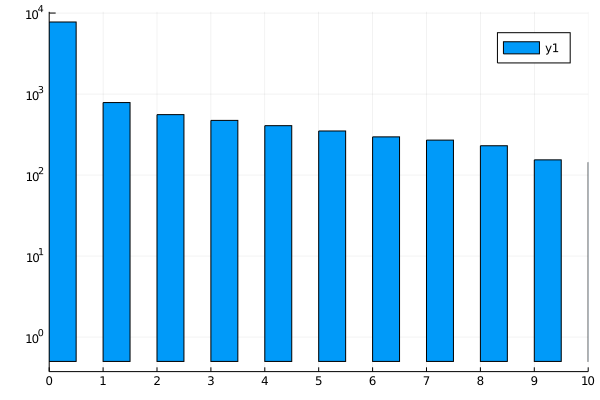

In [55]:
@df df histogram(df.Nominations,xlims=(0,10),xticks = 0:1:10, yaxis=:log)

### Grouped bar chart

In [56]:
genre_win_nom = combine(groupby(df, :genre), :Wins => mean, :Nominations => mean)

,genre,Wins_mean,Nominations_mean
,Cat…,Float64,Float64
1,Unknown,0.328767,0.746575
2,Biography,7.6446,9.26829
3,Comedy,2.77503,4.49469
4,Crime,3.82025,5.55246
5,Action,2.64476,4.87793
6,Adult,0.0434783,0.0
7,Adventure,3.34328,5.93698
8,Animation,1.10638,1.16489
9,Documentary,1.18203,1.05201


In [57]:
sort!(genre_win_nom, [:Nominations_mean,:Wins_mean ], rev=true)[1:3,:]

,genre,Wins_mean,Nominations_mean
,Cat…,Float64,Float64
1,Biography,7.6446,9.26829
2,Drama,6.06132,7.83746
3,GameShow,3.13462,7.26923


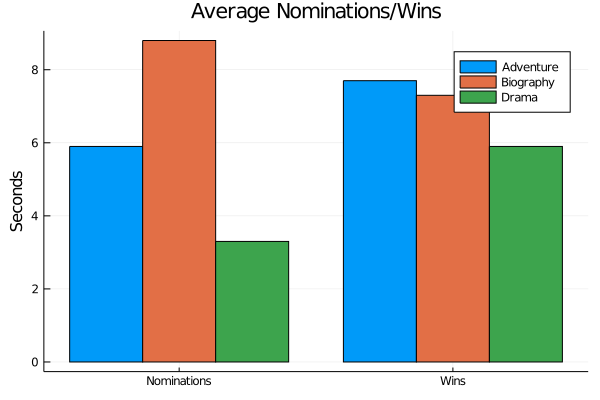

In [58]:
group_name = repeat(["Biography","Drama", "Adventure"], inner = 2)
names_ = repeat(["Wins", "Nominations"], outer=3)
groupedbar(names_, [7.3,8.8,5.9,3.3,7.7,5.9],  group = group_name, ylabel = "Seconds", 
        title = "Average Nominations/Wins",legend =:best)

## Benchmarking against Python and R

Benchamarking involved testing performance across four scenarios on a dataset with 100 Million rows and 8 columns(grouping done on 3 numerical columns)
* Case I :  Grouping by a column and calculating sum of a col in each group
* Case II:  Grouping by 2 columns and calculating sum of a col in each group 
* Case III: Grouping by a column and calculating sum and mean of 2 columns 
* Case IV:  Grouping by a column and calculating mean of 3 columns

![All three](./benchmarks/RpythonJulia.png)

### Single threaded Julia vs SIngle/Multi threaded R

![Julia vs R](./benchmarks/JRsingle_20.png)